1. Open Pymol
2. We are going to work with 2 different protein 
3. ftech the 2 proteins fetch 4lf... and after fetch the other they will overlap
4. we have to use the 3 command that him provide to us, align mobile, cealing target, ...
5. super 4BUO, 4l6r (by clicking on the left panel i can see the 2 different protein) now they are aligned 
6. try with cealign 4BUO, 4l6r (slower but it adentify other aligns) or align 4BUO, 4l6r (faster but it adentify only one align)

7. select one chain on pymol screen and right click and after click remove atoms
8. and try again other align with the command before annd check if RMSD is changed


In [1]:
import pandas as pd
import numpy as np
from Bio.SVDSuperimposer import SVDSuperimposer
from Bio.PDB.PDBParser import PDBParser
import matplotlib.pyplot as plt
import os
from Bio.PDB import PDBList, calc_angle, calc_dihedral, PPBuilder, is_aa, PDBIO, NeighborSearch
from Bio.PDB.PDBParser import PDBParser
from Bio.SeqUtils import IUPACData
from Bio.PDB.PDBIO import Select
from Bio.SeqIO.PdbIO import PdbSeqresIterator
import numpy as np
import math
import matplotlib
import matplotlib.colors as mplcolors
import matplotlib.pyplot as plt
from RamachanDraw import phi_psi
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import copy

In [2]:
def superimpose(segment_1, segment_2):
  """
  return the new coordinates of segment_2 
  upon superposition with segment_1
  """
  sup = SVDSuperimposer()
  sup.set(segment_1, segment_2)
  sup.run()
  rot, tran = sup.get_rotran()
  return np.dot(segment_2, rot) + tran # the updated coordinate is returned

In [3]:
path = "./home/Documents/Structural-Bioinformatics"
id_protein, chain = ['2k0e', 'A' ]
parser = PDBParser(QUIET=True)
# if the file does not exist, it will be downloaded
if os.path.exists(path + "/pdb/pdb{}.ent".format(id_protein.lower())) is True:
  path_pdb = path + "/pdb/pdb{}.ent".format(id_protein.lower())
else:
  pdbl = PDBList()
  path_pdb = pdbl.retrieve_pdb_file(id_protein, pdir=path + "/pdb", file_format="pdb")
structure = parser.get_structure(id_protein, path_pdb)
new_structure = structure.copy()

if os.path.exists(path +'/figures_mid_term2') is False:
  os.mkdir(path +'/figures_mid_term2') 


In [4]:
# Select CA coordinates for each models
coords = []
for i, model in enumerate(structure):
    coords.append([atom.get_coord() for atom in model[chain].get_atoms() if atom.get_name() == "CA"])


In [5]:
# models (rows) x residues (columns)
df_coords = pd.DataFrame(coords)
df_coords

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,"[-4.976, 15.017, 4.103]","[-6.382, 12.533, 6.52]","[-9.938, 13.764, 5.986]","[-11.626, 13.675, 2.644]","[-12.442, 16.575, 0.355]","[-15.916, 17.298, -1.1]","[-14.62, 15.987, -4.465]","[-13.428, 12.723, -3.018]","[-16.612, 12.141, -1.022]","[-18.604, 13.002, -4.066]",...,"[0.486, -8.536, 2.226]","[1.86, -7.271, 5.48]","[1.061, -3.654, 4.924]","[-2.455, -4.629, 4.005]","[-3.102, -6.277, 7.301]","[-1.955, -4.255, 10.32]","[-27.083, -3.552, -1.511]","[-22.28, -1.076, 8.979]","[18.286, -6.291, 2.456]","[9.963, -14.176, 3.993]"
1,"[-14.856, 13.1, 11.148]","[-13.788, 16.279, 9.456]","[-15.865, 18.007, 6.85]","[-14.847, 17.268, 3.254]","[-15.463, 19.111, 0.004]","[-18.481, 18.903, -2.298]","[-16.469, 17.58, -5.201]","[-15.011, 14.934, -2.888]","[-18.43, 13.864, -1.507]","[-19.769, 13.575, -5.046]",...,"[4.735, 1.553, 7.197]","[2.081, -0.379, 9.096]","[-0.636, 2.209, 8.672]","[0.192, 2.814, 5.057]","[-0.001, -0.838, 4.273]","[-2.633, -2.389, 6.535]","[-26.936, -2.866, -1.982]","[-21.268, -1.03, 9.084]","[6.757, 6.178, 24.625]","[12.301, -0.812, 16.274]"
2,"[-8.74, 10.885, 11.794]","[-8.038, 12.859, 8.72]","[-10.616, 13.863, 6.25]","[-11.369, 13.445, 2.559]","[-12.496, 16.149, 0.212]","[-16.036, 16.619, -0.868]","[-15.168, 15.969, -4.438]","[-13.723, 12.644, -3.465]","[-16.696, 11.817, -1.293]","[-18.957, 12.667, -4.138]",...,"[-0.551, -14.416, 0.294]","[2.881, -15.925, -0.278]","[4.868, -12.995, 1.037]","[2.661, -12.283, 4.046]","[3.935, -15.546, 5.489]","[7.722, -15.627, 5.22]","[-26.984, -3.492, -1.649]","[-22.172, -1.122, 8.978]","[4.264, -13.297, -16.779]","[-2.651, -18.857, -9.78]"
3,"[-12.761, 13.711, 12.045]","[-11.527, 15.987, 9.408]","[-13.932, 16.733, 6.602]","[-13.726, 15.964, 2.909]","[-14.091, 18.669, 0.307]","[-17.039, 18.529, -2.034]","[-14.91, 17.226, -4.885]","[-13.605, 14.348, -2.738]","[-17.063, 13.565, -1.328]","[-18.488, 13.398, -4.823]",...,"[1.086, 4.973, 10.707]","[0.077, 6.861, 13.868]","[-2.366, 8.763, 11.752]","[-3.572, 5.453, 10.276]","[-4.166, 3.703, 13.558]","[-6.5, 4.601, 16.465]","[-26.72, -3.387, -2.1]","[-21.847, -1.205, 8.754]","[11.169, 18.681, 15.496]","[10.994, 6.49, 16.996]"
4,"[-9.867, 10.48, 12.414]","[-9.82, 12.899, 9.591]","[-12.21, 14.441, 7.221]","[-12.53, 14.397, 3.435]","[-13.2, 17.18, 1.023]","[-16.544, 17.714, -0.582]","[-15.411, 16.656, -4.075]","[-14.065, 13.382, -2.856]","[-17.046, 12.657, -0.642]","[-19.065, 13.35, -3.78]",...,"[-1.858, -6.71, 6.043]","[-0.526, -5.636, 9.434]","[0.451, -2.109, 8.664]","[-2.546, -1.171, 6.524]","[-4.98, -2.385, 9.234]","[-5.134, 0.166, 12.032]","[-26.777, -3.473, -2.072]","[-22.105, -0.448, 8.588]","[14.749, -12.471, 8.758]","[3.716, -16.158, 8.488]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"[-7.382, 13.208, 10.709]","[-7.009, 15.724, 7.933]","[-9.69, 17.813, 6.239]","[-11.784, 16.208, 3.48]","[-13.031, 18.268, 0.593]","[-16.662, 18.189, -0.376]","[-16.048, 17.095, -3.928]","[-14.029, 14.158, -2.676]","[-16.679, 12.947, -0.283]","[-18.994, 13.259, -3.314]",...,"[7.209, 0.215, -2.71]","[4.458, -1.591, -0.817]","[2.748, 1.776, -0.729]","[2.803, 2.015, -4.43]","[2.671, -1.4, -5.968]","[0.59, -3.569, -3.633]","[-26.84, -3.323, -2.383]","[-21.349, -1.449, 8.767]","[14.751, -1.146, 13.428]","[14.042, -6.497, 3.979]"
156,"[-15.388, 16.7, 6.319]","[-12.465, 15.336, 8.235]","[-9.956, 13.875, 5.737]","[-11.743, 14.159, 2.459]","[-12.863, 17.168, 0.365]","[-16.47, 17.379, -0.842]","[-15.497, 16.612, -4.436]","[-13.907, 13.374, -3.267]","[-16.986, 12.537, -1.296]","[-19.328, 13.102, -4.245]",...,"[-0.9, -14.321, 3.654]","[1.723, -16.339, 5.601]","[2.248, -13.757, 8.298]","[-1.471, -12.771, 8.184]","[-3.221, -16.115, 8.638]","[-3.53, -18.238, 11.716]","[-26.945, -3.378, -1.711]","[-22.121, -0.772, 8.834]","[16.622, -14.424, -0.36]","[6.274, -19.405, -3.861]"
157,"[-10.752, 17.518, 11.655]","[-10.476, 19.023, 8.173]","[-13.641, 18.804, 6.061]","[-1

## Full-length superpostion
Superimpose all models to the first model considering the entire structure

In [6]:
distance_list = []  # distance between models
coords_list = []  # new models coordinates after being superimposed to the first model

# Add coordinates of the first model, the reference
coords_list.append(np.asarray(df_coords.iloc[0,:].values.tolist()))

# Iterate models
for i in range(1, df_coords.shape[0]):
    # Calculate new coordinates
    coords_list.append(superimpose(coords_list[0], np.asarray(df_coords.iloc[i].values.tolist())))
    # Calculate distance (rmsd) 
    distance_list.append(np.sqrt(np.sum((coords_list[0] - coords_list[-1])**2)))

(0.0, 181.33142528533935)

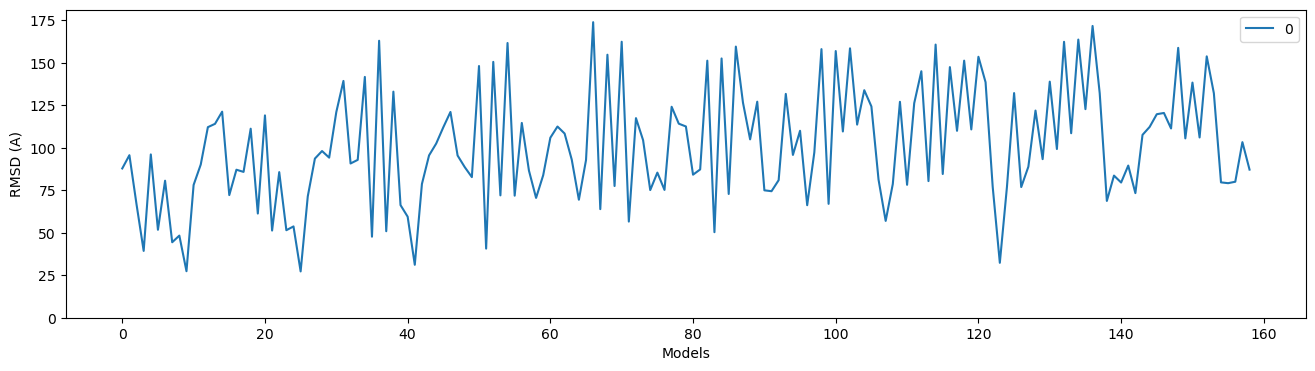

In [7]:
df_ = pd.DataFrame(distance_list)
ax = df_.plot(figsize=(16,4))
ax.set_xlabel("Models")
ax.set_ylabel("RMSD (A)")
ax.set_ylim(0)

#### Residue distance distribution
Calculate distance across models at the residue level

In [8]:
# Swap axes
coords_array = np.array(coords_list)
coords_array = np.swapaxes(coords_array, 0, 1)
coords_array.shape

(152, 160, 3)

In [9]:
# Calculate RMSD at the residue level (all Vs first model)
res_distance = []
for i in range(coords_array.shape[0]):
  distance = []
  for j in range(1, coords_array.shape[1]):
    distance.append(np.sqrt(np.sum(coords_array[i][0] - coords_array[i][j])**2))
  res_distance.append(distance)
res_distance = np.array(res_distance)
res_distance.shape

(152, 159)

Text(0, 0.5, 'Distance (A)')

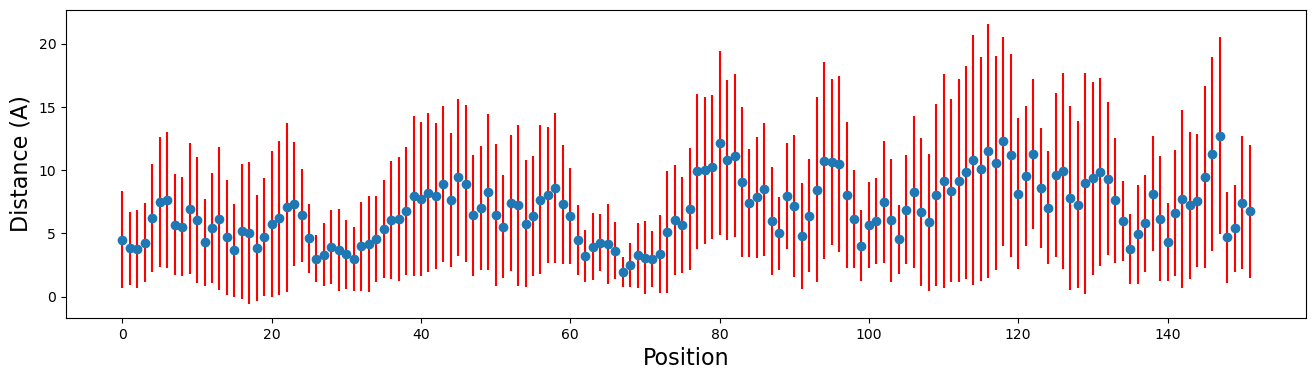

In [10]:
mean = res_distance.mean(axis=1)
std = res_distance.std(axis=1)

plt.figure(figsize=(16,4))
plt.errorbar(range(len(mean)), mean, yerr= std, ecolor='red', fmt = 'o')
plt.xlabel("Position", fontsize=16)
plt.ylabel('Distance (A)', fontsize=16)

## Fragment-based superposition
Superimpose all models to the first model, fragment-by-fragment using a sliding window


In [11]:
window_size = 7
half_window_index = window_size //2 

distance_list = []  # residues x model x fragment

# Iterate models
for i in range(1, df_coords.shape[0]):  
    distance = []

    # Iterate residues
    for j in range(df_coords.shape[1] - window_size):

        # The fragment from the first model
        # Need to stack (convert to a 2D array) for the superposition function
        fragment_reference = np.stack(df_coords.iloc[0, j:j+window_size])
        # print(fragment_reference)

        # Window coordinates (for all models)
        fragment_temp = np.stack(df_coords.iloc[i, j:j+window_size])
        # print(fragment_temp)
       
        # Calculate new coordinates
        fragment_aligned = superimpose(fragment_reference, fragment_temp)
        # print(fragment_aligned)
        #print(np.sum(fragment_reference - fragment_aligned))

        # break
    # break

        # Calculate distance of the fragment
        distance.append(np.sqrt(np.sum((fragment_reference - fragment_aligned))**2))

    distance_list.append(distance)

In [12]:
df_ = pd.DataFrame(distance_list)
df_

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,2.777576e-05,0.000011,9.059906e-06,0.000008,0.000002,0.000009,0.000014,0.000014,0.000015,7.629395e-06,...,2.235174e-06,3.993511e-06,9.536743e-07,4.947186e-06,2.920628e-06,4.887581e-06,2.384186e-07,3.576279e-07,0.000005,1.192093e-06
1,1.084805e-05,0.000010,1.192093e-07,0.000006,0.000003,0.000001,0.000011,0.000003,0.000009,2.384186e-06,...,4.619360e-06,4.321337e-06,7.152557e-07,4.082918e-06,4.976988e-06,7.301569e-06,3.874302e-07,6.198883e-06,0.000005,5.722046e-06
2,3.576279e-07,0.000008,3.814697e-06,0.000006,0.000005,0.000013,0.000013,0.000006,0.000021,9.536743e-07,...,2.771616e-06,6.109476e-06,3.486872e-06,7.271767e-06,3.218651e-06,8.255243e-06,4.768372e-07,5.006790e-06,0.000006,2.622604e-05
3,1.192093e-07,0.000005,4.768372e-06,0.000003,0.000016,0.000022,0.000010,0.000001,0.000011,4.768372e-06,...,3.874302e-07,1.817942e-06,3.486872e-06,8.642673e-07,3.576279e-07,5.602837e-06,6.675720e-06,9.059906e-06,0.000013,7.271767e-06
4,2.288818e-05,0.000006,3.814697e-06,0.000009,0.000020,0.000007,0.000006,0.000018,0.000015,3.576279e-06,...,8.076429e-06,1.639128e-06,1.490116e-07,1.549721e-06,1.072884e-06,5.871058e-06,7.033348e-06,2.384186e-06,0.000004,2.861023e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.192093e-07,0.000012,1.192093e-05,0.000018,0.000002,0.000013,0.000006,0.000009,0.000005,7.629395e-06,...,6.288290e-06,3.576279e-07,2.861023e-06,3.695488e-06,2.622604e-06,3.337860e-06,8.821487e-06,3.695488e-06,0.000006,2.384186e-06
155,4.768372e-06,0.000004,1.093745e-05,0.000032,0.000015,0.000021,0.000012,0.000011,0.000016,1.668930e-05,...,4.917383e-06,1.341105e-06,7.003546e-06,1.579523e-06,6.526709e-06,4.768372e-07,3.576279e-07,3.457069e-06,0.000004,1.907349e-06
156,1.084805e-05,0.000009,3.337860e-06,0.000012,0.000010,0.000002,0.000010,0.000012,0.000003,6.437302e-06,...,4.857779e-06,6.109476e-06,1.192093e-07,5.364418e-06,8.344650e-07,5.662441e-06,9.536743e-07,2.980232e-06,0.000001,7.152557e-07
157,3.218651e-06,0.000006,1.072884e-06,0.000018,0.000008,0.000019,0.000002,0.000025,0.000016,1.120567e-05,...,2.235174e-06,1.177192e-05,3.546476e-06,2.056360e-06,3.486872e-06,1.180172e-05,8.136034e-06,1.108646e-05,0.000019,6.198883e-06


Text(0, 0.5, 'RMSD (A)')

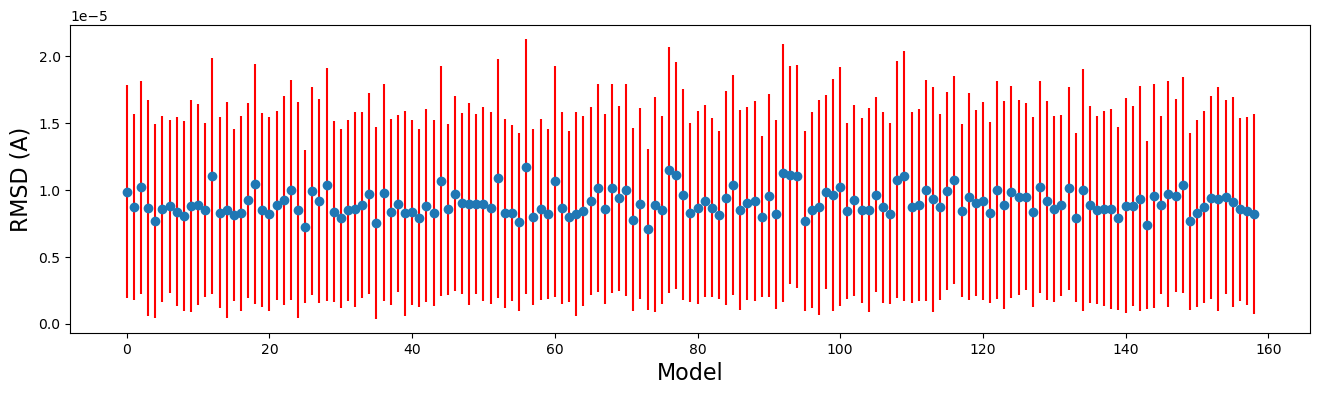

In [13]:
mean = df_.mean(axis=1)
std = df_.std(axis=1)

plt.figure(figsize=(16,4))
plt.errorbar(range(len(mean)), mean, yerr= std,
             ecolor='red', fmt = 'o')
plt.xlabel("Model", fontsize=16)
plt.ylabel('RMSD (A)', fontsize=16)

Text(0, 0.5, 'RMSD (A)')

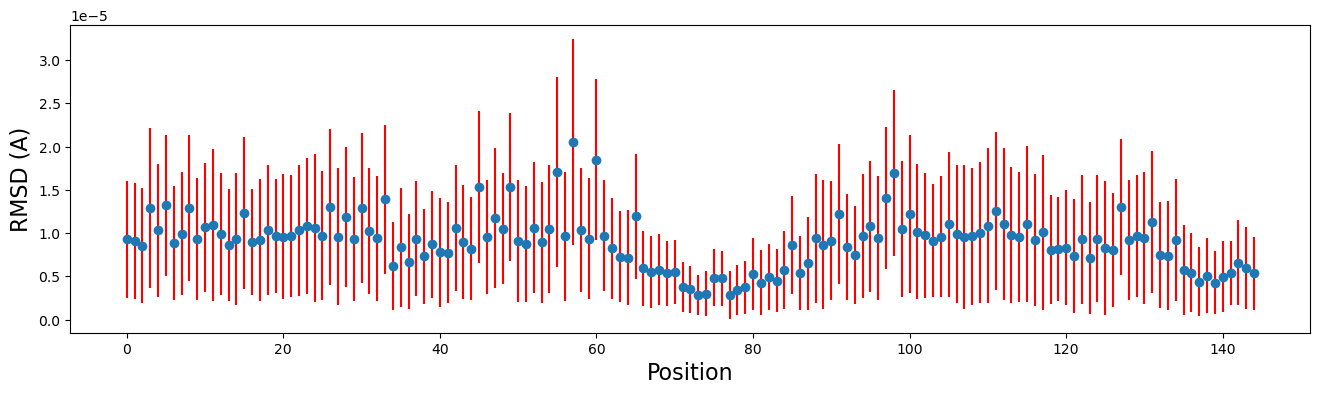

In [14]:
mean = df_.mean(axis=0)
std = df_.std(axis=0)

plt.figure(figsize=(16,4))
plt.errorbar(range(len(mean)), mean, yerr= std,
             ecolor='red', fmt = 'o')
plt.xlabel("Position", fontsize=16)
plt.ylabel('RMSD (A)', fontsize=16)

## Exercise

Compare a couple of different ensembles of the [P38634](https://proteinensemble.org/P38634) entry of the PED database. 
* Compare just one replica for each ensemble, for example PED00001e001 Vs PED00014e004. 
* Consider ensmbles can have multiple chains. 